# 연구 목표 수립

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 유사 서비스 구현
 - 파파고, 카카오 번역, 구글 번역
 - 이들 서비스들 중 **언어감지**를 머신러닝을 구현해여 웹 서비스를 구현하여 적용해 보기
- 목표
 - 머신러닝으로 만들어진 모델이 어떻게 적용되는지 이해 
 - 앞선 과정과 머신러닝에서 산출까지 어떻게 연결되는지 과정 이해
- 조건
 - 머신러닝을 배운 적이 없어서 필요한 것 외에는 전부 가정하고 진행
 - 언어 감지영역
   - 알파벳을 사용하는 언어권만 가능
   - A~Z까지 문자를 대상(26)
   - 논문참고
     - 알파벳을 문자로 사용하는 국가별로 사용하는 언어체계에서  A~Z까지 사용빈도가 다르다
     - 이를 근거로 언어별로 알파벳 사용빈도가 다르다라는 주장을 기반으로 프로젝트가 진행(데이터 분석 단계에서 간단하게 간단하게 시각적으로 확인)
     - 문자 26개, 정답은 1개(영어, 프랑스어, 인도네시아어, 타갈리어)
     - shape => (n, 26+1)
     - 말뭉치 -> A~Z까지 사용 
     - A~Z까지 특정 말뭉치상에 등장한 빈도 수: 데이터 전처리
     - 예측결과
       - 이 말뭉치는 영어입니다.
       - 이 말뭉치는 프랑스어입니다.
       - 위 같은 표현은 지도학습 정답에 카테고리화가 되어 있어서 분류의 문제이다.
    

- 산출물
  - 웹서비스 구현
    - 페이지 1장
    - 가장 간단하게 flask를 통해서 구현
      - 장점 : flask는 마이크로 에디션, 경량, 자유도가 높고, 모듈 이식이 간단하다(파이썬과 동일)

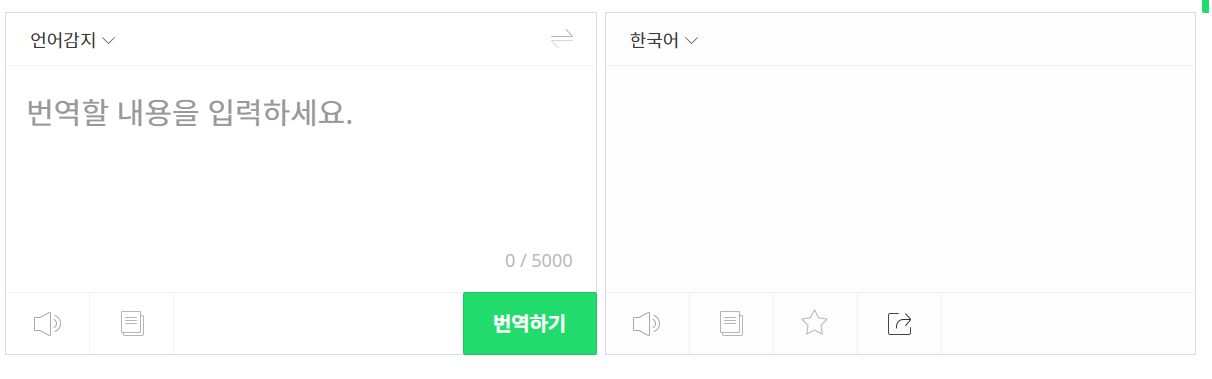

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/ComputerProgramming/res/산출물.png')
# 산출물 예시

# 데이터 수집/획득

- 실전방식
  - 여기서는 train.zip, test.zip을 활용

- 수업방식
  - 위키피디아에서 데이터를 수집 -> 전처리-> 정규화 -> 데이터 정제과정을 거쳐서 구축
  - (n, 26 + 1)
  - 26개의 독립변수는 수치(빈도수)로, 1개의 종속변수는 국가코드로 표현(en, fr,..)
  - 아래 링크 데이터를 기준으로 말뭉치를 가져와서 데이터화 해보겠다
    - https://en.wikipedia.org/wiki/BTS
    - 타겟 사이트 점검 결과 Level 3 웹 스크래핑 기술만으로 가능하다
      - BS4를 사용해서 필요한 만큼 추출(텍스트만 추출) 
      - BS4 -> html 텍스트 -> 파싱 -> Dom tree -> html을 탐색해서 원문만 추출 (css selector or xpath)
      - css selector 사용
        - **#mw-content-text p**
        - 이 요소 하위에 있는 텍스트만 추출

  
  - 제공된 파일 사용(최종)


## 모듈 가져오기

In [ ]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.4.2
bs4                           0.0.1
CacheC

In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup

## 사이트 접속

In [ ]:
target_site = 'https://en.wikipedia.org/wiki/BTS'
res = req.urlopen(target_site)
res  

## 파싱
- html을 DOM(Documents Object Model)모델로 로드하는 작업 : 파싱
- dom : html의 마크업 랭귀지를 객체화 해서 조작, 탐색하게끔 제공해주는 기술
- 파싱하는 도구는 파서(parser)
  - 'html5lib' : 느리지만 대용량 html도 정확하게 처리 가능

In [ ]:
soup = BeautifulSoup(res, 'html5lib')
soup

## 데이터 추출

In [ ]:
# 추출
# 해당 css.selector에 일치되는 모든 요소들을 가져온다 => 리스트
ps = soup.select('#mw-content-text p')
len(ps)

54

In [ ]:
ps[10].text

# ps에서, 텍스트를 모두 추출해서, 리스트,에 담으시오
# for -> 동적으로 데이터를 추출해서 담겠다
tmp = list()
for p in ps :
  tmp.append(p.text)
tmp  

['\n',
 '\n\n\n',
 'BTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a South Korean boy band that was formed in 2010 and debuted in 2013 under Big Hit Entertainment.[5] The septet—consisting of members Jin, Suga, J-Hope, RM, Jimin, V, and Jungkook—co-writes and co-produces much of their own output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth and coming of age, loss, the journey towards loving oneself, and individualism. Their work also often references literature and psychological concepts and includes an alternative universe storyline.\n',
 'After debuting in 2013 with their single album 2 Cool 4 Skool, BTS released their first Korean-language studio album, Dark & Wild, and Japanese-language studio album, Wake Up, in 2014. The group\'s second Korean studio album, Wings (

In [ ]:
# 리스트 내포
tmp = [p.text for p in ps ]
tmp[:10]
# 데이터가 지저분하다 => 남겨야 하는데? => 케이스가 많다 => 정규식 고려!!

['\n',
 '\n\n\n',
 'BTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a South Korean boy band that was formed in 2010 and debuted in 2013 under Big Hit Entertainment.[5] The septet—consisting of members Jin, Suga, J-Hope, RM, Jimin, V, and Jungkook—co-writes and co-produces much of their own output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth and coming of age, loss, the journey towards loving oneself, and individualism. Their work also often references literature and psychological concepts and includes an alternative universe storyline.\n',
 'After debuting in 2013 with their single album 2 Cool 4 Skool, BTS released their first Korean-language studio album, Dark & Wild, and Japanese-language studio album, Wake Up, in 2014. The group\'s second Korean studio album, Wings (

- 데이터 수집 단계에서 데이터 전처리 단계로 산출물을 넘길 때, 말뭉치(하나의 문자열 형태)로 넘기겠다.
- 리스트 (구성원은 문자열) => 문자열 1개로 전달

In [ ]:
# 구분자를 넣고 한개의 문자열로 통합 => 문자열.join(연속형 데이터)
tmps = ' '.join(tmp)
tmps

'\n \n\n\n BTS (Korean:\xa0방탄소년단; RR:\xa0Bangtan Sonyeondan), also known as the Bangtan Boys, is a South Korean boy band that was formed in 2010 and debuted in 2013 under Big Hit Entertainment.[5] The septet—consisting of members Jin, Suga, J-Hope, RM, Jimin, V, and Jungkook—co-writes and co-produces much of their own output. Originally a hip hop group, their musical style has evolved to include a wide range of genres. Their lyrics, often focused on personal and social commentary, touch on the themes of mental health, troubles of school-age youth and coming of age, loss, the journey towards loving oneself, and individualism. Their work also often references literature and psychological concepts and includes an alternative universe storyline.\n After debuting in 2013 with their single album 2 Cool 4 Skool, BTS released their first Korean-language studio album, Dark & Wild, and Japanese-language studio album, Wake Up, in 2014. The group\'s second Korean studio album, Wings (2016), was th

- 잡음 제거(전처리 과정)
- a~z가 아닌 문자는 모두 제거한다 -> 정규식


## 정규식 처리

In [ ]:
import re

In [ ]:
# [] : 문자(글자) 한개 1개
# a-z : 알파벳 a ~ z까지 26개중에 한개
# [a-z] : a ~ z까지 중에 아무거나 1개
# A-Z : 알파벳 A ~ Z까지 26개중에 한개
# [a-zA-Z] : a ~ z 혹은 A ~ Z 중에 아무거나 1개
# * : 0~ 무한대
# + : 1~ 무한대
# [^]: [^ ... ] 문자 클레스안에 있는 글자를 제외하고
pattern = '[^a-zA-Z]*'
p = re.compile( pattern )

In [ ]:
# 알파벳이 아닌 문자들을 모두 찾아서 '' 으로 대체해라
# 일반적으로 영어 알파벳을 자연어 처리할때, 통상 소문자로 바꿔서 처리한다
tmp = p.sub( '' , tmps ).lower()
tmp

'btskoreanrrbangtansonyeondanalsoknownasthebangtanboysisasouthkoreanboybandthatwasformedinanddebutedinunderbighitentertainmenttheseptetconsistingofmembersjinsugajhopermjiminvandjungkookcowritesandcoproducesmuchoftheirownoutputoriginallyahiphopgrouptheirmusicalstylehasevolvedtoincludeawiderangeofgenrestheirlyricsoftenfocusedonpersonalandsocialcommentarytouchonthethemesofmentalhealthtroublesofschoolageyouthandcomingofagelossthejourneytowardslovingoneselfandindividualismtheirworkalsooftenreferencesliteratureandpsychologicalconceptsandincludesanalternativeuniversestorylineafterdebutinginwiththeirsinglealbumcoolskoolbtsreleasedtheirfirstkoreanlanguagestudioalbumdarkwildandjapaneselanguagestudioalbumwakeupinthegroupssecondkoreanstudioalbumwingswastheirfirsttosellonemillioncopiesinsouthkoreabybtscrossedintotheglobalmusicmarketleadingthekoreanwaveintotheunitedstatesandbreakingnumeroussalesrecordstheybecamethefirstkoreangrouptoreceiveacertificationfromtherecordingindustryassociationofamericaria

# 데이터 준비/전처리/정제

- 현재상황
 - 데이터 수집파트로부터 train/*.txt파일 20개를 제공받았다(훈련용)
 - 데이터 수집파트로부터 text/*.txt파일 10개를 제공받았다(훈련용)
   - 훈련 시 만나보지 못한 데이터이다.
   - 덩어리 채로 주고, 데이터 준비단계에서 개발자가 열어서 분할하던지(비율 조절이 가능하다)
   - 일반적으로 75:25 비율을 선호(절대적인 것은 아님)
     - 75(50+25) = 훈련용(50), 검증용(25)
     

- 산출물
 - (n, 26+1) 형태의  csv 혹은 json 혹은 기타 포맷으로 제공
 - **json 형태로 저장**
 - 형식
   - a~z 까지 빈도수는 각각 말뭉치별로 계산해서, 훈련용시 총 20개를 묶어서 freqs라는 키값에 저장
   - 훈련용 데이터 총 20개의 각각 언어코드는 labels 키값에 저장

```
독립변수

{
  "freqs":[ [
    103818,28281,...., 1901
  ], [], .... ],

종속변수

  "labels":[
    "en", "fr", ...
  ]
}
```


   

## 파일 경로 가져오기

- 특정 경로를 지정해서 그 하위 디렉토리에서 **파일 목록을 가져온다**
  - glob  
- ex
  - -/train/*.txt
  - -/test/*.txt 

In [ ]:
import glob

files = glob.glob('/content/drive/MyDrive/res/train/*.txt')
len( files ), type( files ), files[0]

(20, list, '/content/drive/MyDrive/res/train/fr-9.txt')

## 파일 읽어서 데이터 로드

### 정답 추출
- "/content/drive/MyDrive/res/train/**en-2.txt**"
- 파일명에서 앞에 2글자가 정답이다
  - 1. 파일명 획득
  - 2. 정답 추출
  - 3. 전체 files 에 적용
  - 이 방법은 데이터의 경로가 변경되도 동일하게 적용된다
  - 만약, 경로를 문자열로 보고 처리한다면
    - 구현하기는 상황에 따라 경로가 변경되어도 동일한 처리가 가능할 수 있다.

In [ ]:
files[0]
# 문자열로 보고 en을 추출하시오
files[0].split('/')[-1][:2]

'fr'

In [ ]:
# 파일 경로로 인식해서 처리하는 방식
# 이 방식으로 사용
import os

naCode = os.path.basename( files[0] )[:2]
naCode

'fr'

In [ ]:
# 정규식 -> 문자열으로 보고 처리하는 방식
# ^[] : 주어진 문자로 시작한다
# 알파벳 소문자 2개로 시작하고
# 파일명에서 정답을 추출하는 정규식
p     = re.compile( '^[a-z]{2}' )
fName = os.path.basename( files[0] )
p.match( fName ).group()

'fr'

### 빈도 추출
- 파일 1개당 산출물
  - [10, 11, 12, ..., 2]

In [ ]:
# 파일 읽기 -> I/O -> 오류 동반(파일, 네트워크, DB,...) -> try - except(예외처리)
# with문 사용 권장 -> 개발자는 close를 누락시킬 수 있다. 자동 닫기 제공
f = open(files[0])

f.close()

In [ ]:
for ch in 'hello':
  print( ch )

h
e
l
l
o


In [ ]:
with open(files[0]) as f :
  # 1. 파일을 읽는다(소문자로 바로 변환한다)
  text = f.read().lower()
  # print(text[:100])
  # 2. 알파벳 소문자만 남기고 모두 제거 혹은 전처리 과정 수행
  p = re.compile( '[^a-z]*' )
  text = p.sub( '' , tmps ).lower()
  print(text[:100])
  # 3. 한 글자씩 뽑아서 카운팅
  STD_INDEX = ord('a')
  cnts = [0]*26
  for ch in text:
   index = ord(ch) - STD_INDEX
  # 특정 문자의 방번호를 찾아서 거기 값 1 증가
  cnts[index] += 1 
  #break
  # 4. 리스트에 담는다(혹은 카운팅 하면서 바로 담는다)
   # a -> 0번 자리
   # b -> 1번 자리
   # c -> 2번 자리
   # z -> 25번 자리
   # 자리값은 = (개별 알파벳 아스키값) - (a의 아스키 값)
   # a => 아스키값을 추출하는 함수
   #[1,2,3,4,....,5]
  # 실습 리스트로 카운트를 출력하시오
  pass

oreanangtanonyeondanalsoknownastheangtanoysisaouthoreanboybandthatwasformedinanddebutedinunderigitnt


In [ ]:
sams = 'oreanangtanonyeondanalsoknownasthe'
# 1회만 체크하고 계속 사용, 값 변경 없음, 상수 스타일로 적용
STD_INDEX = ord('a')
cnts = [0]*26
for ch in sams:
  index = ord(ch) - STD_INDEX
  # 특정 문자의 방번호를 찾아서 거기 값 1 증가
  cnts[ index ] += 1
  #print( f'문자={ch}, 위치={ index }' )
  #break
cnts

[6, 0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 1, 0, 8, 5, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0]

In [ ]:
with open( files[0] ) as f:  
  text      = f.read().lower()
  p         = re.compile( '[^a-z]*' )
  text      = p.sub( '' , text ).lower()
  STD_INDEX = ord('a')
  cnts      = [0]*26
  for ch in text:    
    index          = ord(ch) - STD_INDEX
    cnts[ index ] += 1
print(cnts)
# 빈도를 값을 살펴보니, 값의 편차가, 굳이 계산하지 않아도 크게 보인다
# 값의 범위를 0 ~ 1 사이로 정규화해서 학습시 정확도가 높아지게 적용해 보겟다(학습수 적용해도 된다)
# 개별 빈도수/전체 빈도수 => a-z가 가지는 각각의 빈도 지분율 -> 영향력 -> 언어의 특성으로 작용
# 지분의 총합=> 1.0, 이런 역활을 수행하는 활성화함수 softmax
# 직접 비슷하게 구현해 보겟다


[405, 59, 181, 266, 735, 62, 103, 100, 461, 20, 12, 295, 127, 410, 306, 120, 24, 399, 371, 325, 225, 72, 2, 17, 27, 6]


In [ ]:
# cnts -> 개별값들을 개별빈도/전체빈도 계산해서 대체하시오
# pandas에서 개별요소를 접근하여 값을 조정한다(=> apply(lambda x : -))
# python map()
total_count = sum(cnts)
# map(개별빈도/전체빈도 함수,cnts)
# x는 cnts의 개별 요소
cnt_norms = list(map(lambda x: x/total_count,cnts))
print(cnt_norms)
# softmax 함수를 흉내낸 것이라 총합이 1이 아니다
sum(cnt_norms)

[0.07894736842105263, 0.011500974658869395, 0.035282651072124756, 0.05185185185185185, 0.14327485380116958, 0.012085769980506823, 0.020077972709551656, 0.01949317738791423, 0.0898635477582846, 0.003898635477582846, 0.0023391812865497076, 0.057504873294346975, 0.024756335282651074, 0.07992202729044834, 0.05964912280701754, 0.023391812865497075, 0.004678362573099415, 0.07777777777777778, 0.0723196881091618, 0.06335282651072124, 0.043859649122807015, 0.014035087719298246, 0.0003898635477582846, 0.003313840155945419, 0.005263157894736842, 0.0011695906432748538]


1.0

In [ ]:
ord('a'),ord('b'),ord('c'),ord('z')

(97, 98, 99, 122)

In [ ]:
freqs = list()
labels = list()
for file in files:
  # 정답 추출
  label = os.path.basename( file )[:2]
  labels.append( label )
  # 빈도수 계산
  with open( file ) as f:  
    text      = f.read().lower()
    p         = re.compile( '[^a-z]*' )
    text      = p.sub( '' , text ).lower()
    STD_INDEX = ord('a')
    cnts      = [0]*26
    for ch in text:    
      index          = ord(ch) - STD_INDEX
      cnts[ index ] += 1
    total_count = sum( cnts)
    cnt_norms   = list( map( lambda x: x/total_count, cnts ) )
    # 파일 1개당 완성된 빈도 리스트를 전체 목록에 추가한다
    freqs.append( cnt_norms)
print( len(freqs), freqs )
print( len(labels), labels )

20 [[0.07894736842105263, 0.011500974658869395, 0.035282651072124756, 0.05185185185185185, 0.14327485380116958, 0.012085769980506823, 0.020077972709551656, 0.01949317738791423, 0.0898635477582846, 0.003898635477582846, 0.0023391812865497076, 0.057504873294346975, 0.024756335282651074, 0.07992202729044834, 0.05964912280701754, 0.023391812865497075, 0.004678362573099415, 0.07777777777777778, 0.0723196881091618, 0.06335282651072124, 0.043859649122807015, 0.014035087719298246, 0.0003898635477582846, 0.003313840155945419, 0.005263157894736842, 0.0011695906432748538], [0.16920496477692049, 0.02529352566252935, 0.004562227440456223, 0.03240523314324052, 0.06970815162697082, 0.007916806440791681, 0.045085541764508553, 0.015028513921502852, 0.09734988258973498, 0.006642066420664207, 0.0409929553840993, 0.04850721234485072, 0.04340825226434083, 0.08896343508889634, 0.05790003354579, 0.029654478362965447, 0.0, 0.050050318685005035, 0.05441127138544113, 0.0497819523649782, 0.04662864810466286, 0.0

- 텍스트를 넣어서 빈도 데이터로 만드는 부분은 flask로 웹 구현시 사용자 입력값을 동일하게 처리해야 하는 부분이 존재함 -> 함수화 시켜서 모듈화 시킬 필요 있음

In [ ]:
import glob
# 함수화
# 단, 웹에서 사용시에는 파일이 없다(이부분은 생략가능)
# 순수함수(단독구동이 가능한 독립적인 함수)
def makeData(path = 'train',*a, **kwargs):
#------------------------------------------------ 
  files = glob.glob(f'/content/drive/MyDrive/res/{path}/*.txt')
  freqs = list()
  labels = list()
  for file in files:
   label = os.path.basename( file )[:2]
   labels.append( label )
  # 빈도수 계산
   with open( file ) as f:  
    text      = f.read().lower()
    p         = re.compile( '[^a-z]*' )
    text      = p.sub( '' , text ).lower()
    STD_INDEX = ord('a')
    cnts      = [0]*26
    for ch in text:    
      index          = ord(ch) - STD_INDEX
      cnts[ index ] += 1
    total_count = sum( cnts)
    cnt_norms   = list( map( lambda x: x/total_count, cnts ) )
    freqs.append( cnt_norms)
  return {
    "freqs":freqs,
    "labels":labels
  }
  # --------------------
  pass

train_data = makeData()
test_data  = makeData( 'test' )

print( train_data)

{'freqs': [[0.07894736842105263, 0.011500974658869395, 0.035282651072124756, 0.05185185185185185, 0.14327485380116958, 0.012085769980506823, 0.020077972709551656, 0.01949317738791423, 0.0898635477582846, 0.003898635477582846, 0.0023391812865497076, 0.057504873294346975, 0.024756335282651074, 0.07992202729044834, 0.05964912280701754, 0.023391812865497075, 0.004678362573099415, 0.07777777777777778, 0.0723196881091618, 0.06335282651072124, 0.043859649122807015, 0.014035087719298246, 0.0003898635477582846, 0.003313840155945419, 0.005263157894736842, 0.0011695906432748538], [0.16920496477692049, 0.02529352566252935, 0.004562227440456223, 0.03240523314324052, 0.06970815162697082, 0.007916806440791681, 0.045085541764508553, 0.015028513921502852, 0.09734988258973498, 0.006642066420664207, 0.0409929553840993, 0.04850721234485072, 0.04340825226434083, 0.08896343508889634, 0.05790003354579, 0.029654478362965447, 0.0, 0.050050318685005035, 0.05441127138544113, 0.0497819523649782, 0.046628648104662

## 데이터 적재
- train.json
- test.json
- 자료구조를 유지하면서 파일에 기록되는 형태

In [ ]:
import json

In [ ]:
# 파일 저장
with open('train.json', 'w') as f:
  json.dump(train_data, f)

with open('test.json', 'w') as f:
  json.dump(test_data, f)

# 파일 로드


# 데이터 분석

- pandas를 이용
 - DataFrame 구축
   - *.json 파일을 읽어서 df를 구성하시오
 - 시각화를 통해서 언어별로 a~z까지의 빈도가 다름을 확인한다
 - 나름 이부분에 대한 주장이 근거가 있음을 확인
  

## 모듈 가져오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [ ]:
# 주피터에서 작업한 모듈의 버전과 소프트웨어에서 사용한 버전이 일치해야 한다
np.__version__ , pd.__version__

('1.21.5', '1.3.5')

## 데이터프레임 구성

In [ ]:
# json 로드
with open('/content/train.json') as f:
 tmp = json.load(f)
 #print(tmp)

# df 로드(a~z까지 빈도를 담고 있는 데이터를 df로 로드, 현재는 2차원 리스트)
df_freqs = pd.DataFrame(tmp['freqs'] )
df_freqs.head(1)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.078947,0.011501,0.035283,0.051852,0.143275,0.012086,0.020078,0.019493,0.089864,0.003899,...,0.004678,0.077778,0.07232,0.063353,0.04386,0.014035,0.00039,0.003314,0.005263,0.00117


In [ ]:
from string import ascii_lowercase
ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [ ]:
# 컬럼명 조절
# 현재 : 0,1,2... => a,b,c...,z
df_freqs.columns = list(ascii_lowercase)
df_freqs.head(1)

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,0.078947,0.011501,0.035283,0.051852,0.143275,0.012086,0.020078,0.019493,0.089864,0.003899,...,0.004678,0.077778,0.07232,0.063353,0.04386,0.014035,0.00039,0.003314,0.005263,0.00117


In [ ]:
df_freqs.shape
# (20,26+1)
# 정답 컬럼이 추가되어야 한다
# 컬럼 추가하기 or 정답용 df를 구성해서 합치기
# df_freqs['label'] = 데이터(단, 인덱스와 동일한 크기 => 20개)
df_labels = pd.DataFrame(tmp['labels'])
df_labels.head(1)
df_labels.columns = ['label']

In [ ]:
df_freqs.shape,df_freqs.shape

((20, 26), (20, 26))

In [ ]:
# df 합치기 => concat(), merge()
# (20,26+1)
df_tmp = pd.concat([df_freqs,df_labels], axis =1)
df_tmp.shape

(20, 27)

## 시각화를 통한 a~z가 언어별로 다름을 확인

In [ ]:
df_tmp.head(1)

,a,b,c,d,e,f,g,h,i,j,...,r,s,t,u,v,w,x,y,z,label
0,0.078947,0.011501,0.035283,0.051852,0.143275,0.012086,0.020078,0.019493,0.089864,0.003899,...,0.077778,0.07232,0.063353,0.04386,0.014035,0.00039,0.003314,0.005263,0.00117,fr


In [ ]:
# 컬럼들 중에, label이라는 컬럼은 값이 중복되는 것이 있다 => 값은 총 몇가지인가?
df_tmp.label.unique()
# 머신러닝 > 지도학습 > 분류의 종속변수는 카테고리화 되어 있어, 카운트가 가능하다
# 답이 총 4개 -> 피벗테이블의 타겟이 된다
# 기본값으로 평균으로 데이터가 통합되었다
df_tmp_pv = df_tmp.pivot_table(index = df_tmp.label)
df_tmp_pv

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
label,,,,,,,,,,,,,,,,,,,,,
en,0.075558,0.018601,0.036565,0.039376,0.124937,0.016977,0.023900,0.042127,0.074847,0.002329,...,0.001592,0.070693,0.070782,0.085701,0.026975,0.011627,0.016694,0.002466,0.016232,0.000788
fr,0.076183,0.013140,0.036707,0.049217,0.150272,0.012729,0.013278,0.014709,0.077658,0.003138,...,0.005976,0.077309,0.074177,0.067647,0.049076,0.013363,0.001796,0.004234,0.004813,0.000915
id,0.160047,0.026276,0.008391,0.038213,0.085395,0.008259,0.044496,0.017399,0.095626,0.006473,...,0.000036,0.056469,0.061414,0.049494,0.044268,0.003768,0.004730,0.000725,0.012463,0.000807
tl,0.210537,0.021824,0.010842,0.019756,0.041240,0.003260,0.075524,0.014543,0.078540,0.001603,...,0.000680,0.030609,0.054899,0.051996,0.030127,0.002815,0.009956,0.000430,0.025048,0.001396


In [ ]:
df_tmp_pv.T

label,en,fr,id,tl
a,0.075558,0.076183,0.160047,0.210537
b,0.018601,0.013140,0.026276,0.021824
c,0.036565,0.036707,0.008391,0.010842
d,0.039376,0.049217,0.038213,0.019756
e,0.124937,0.150272,0.085395,0.041240
f,0.016977,0.012729,0.008259,0.003260
g,0.023900,0.013278,0.044496,0.075524
h,0.042127,0.014709,0.017399,0.014543
i,0.074847,0.077658,0.095626,0.078540
j,0.002329,0.003138,0.006473,0.001603


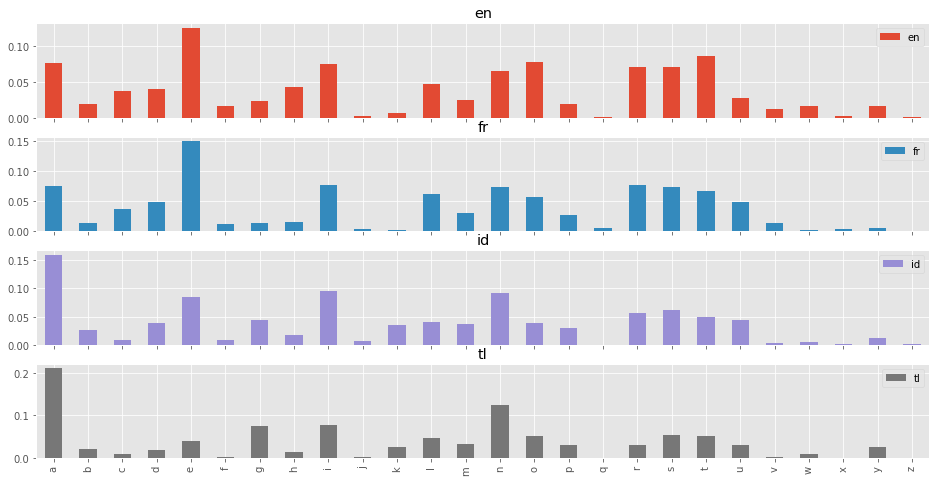

In [ ]:
# 시각화
# 스타일 정의
plt.style.use('ggplot')

# df에서 직접 그려봄
df_tmp_pv.T.plot(kind = 'bar', subplots = True, figsize = (16,8))

# 보여줘
plt.show()

# x 축은 a~z
# y 축은 빈도값
# 컬럼별로 별도로 차트 생성
# y축 리미트를 동일하게 설정(최대치로) 0.25


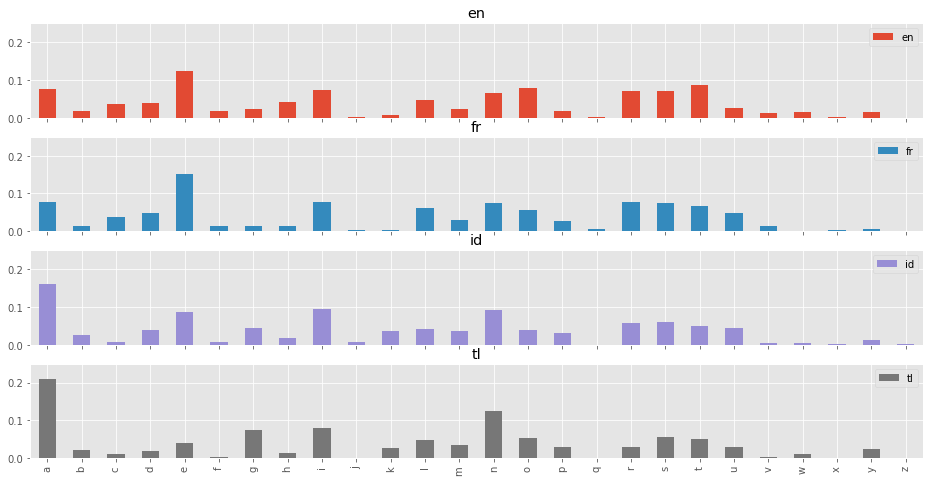

In [ ]:
plt.style.use('ggplot')
df_tmp_pv.T.plot(kind = 'bar', subplots = True, figsize = (16,8),ylim = (0,0.25))
plt.show()

In [ ]:
# 위의 차트를 보고 개별적인 a~z까지의 차이점을 구분하기 힘들다
# 각 문자별로 빈도분포를 그려서 차이점을 체크
# 한개의 차트에 a라는 문자의 빈도를 각각 언어별로 그린다 -> 겹칠수 있으니까 반투명하게
# 국가별로 동일한 색상으로 => 히스토그램 

a


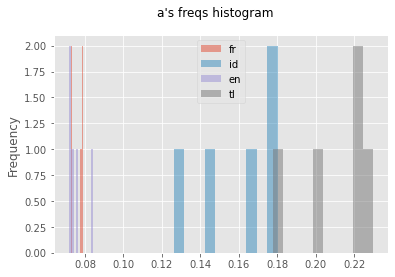

b


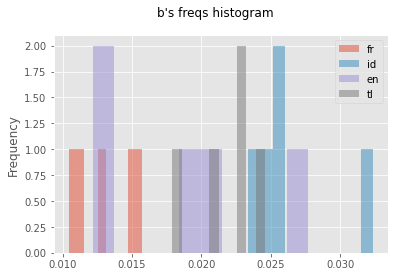

c


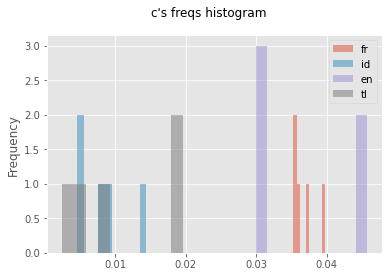

d


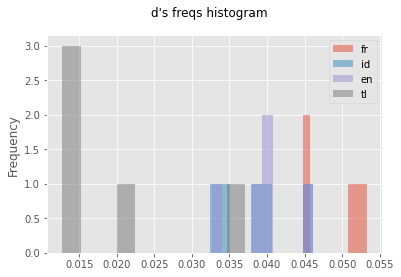

e


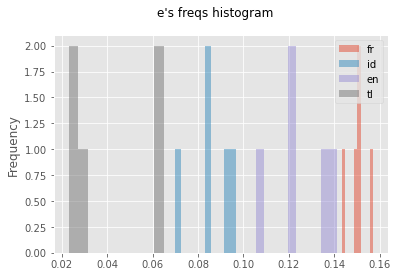

f


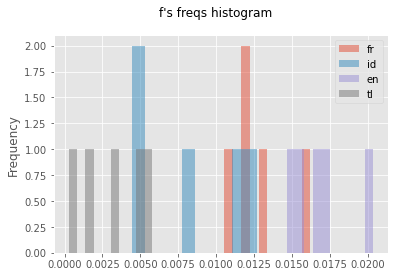

g


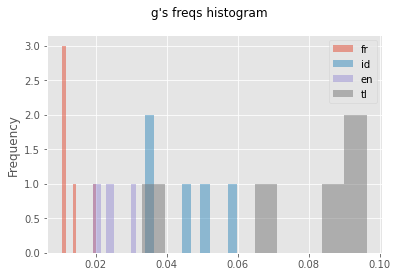

h


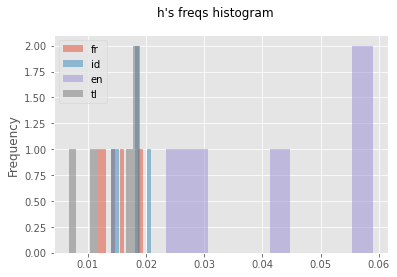

i


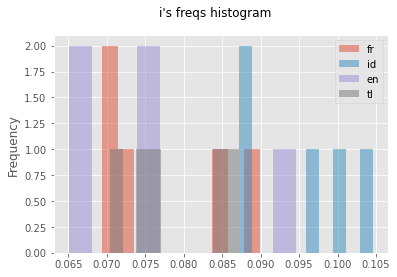

j


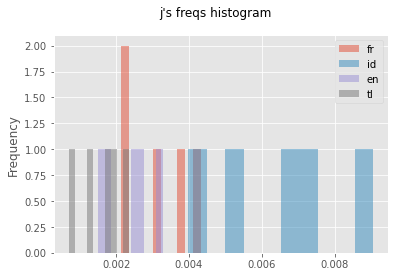

k


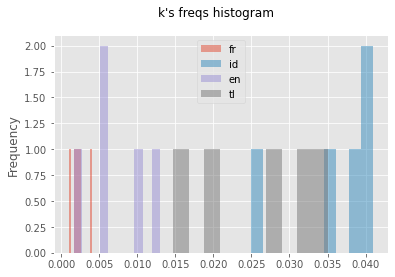

l


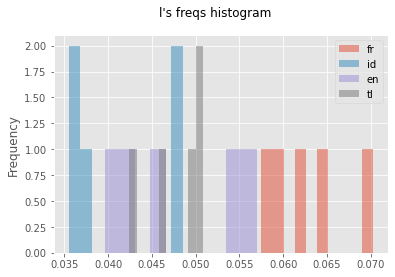

m


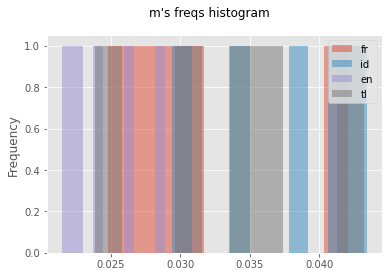

n


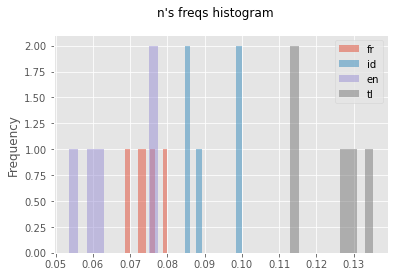

o


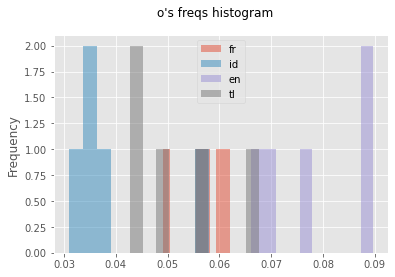

p


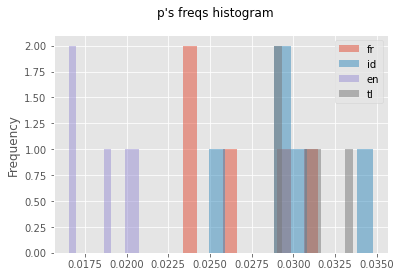

q


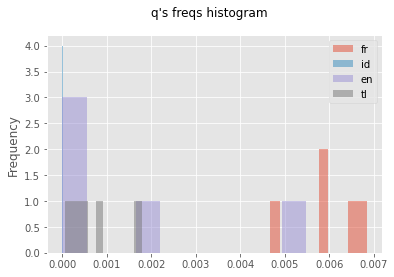

r


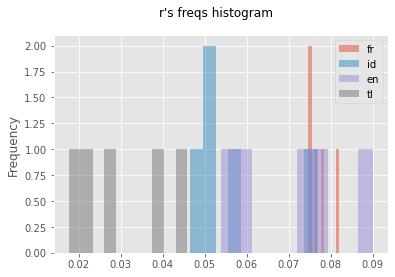

s


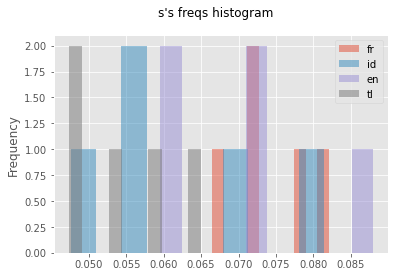

t


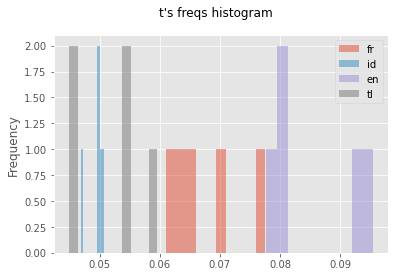

u


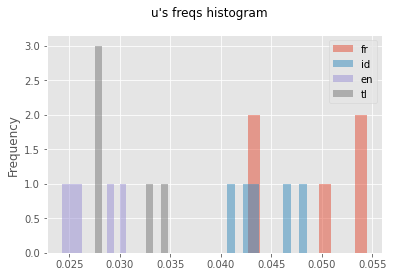

v


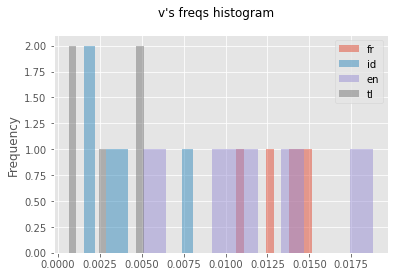

w


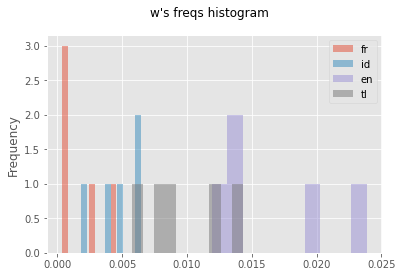

x


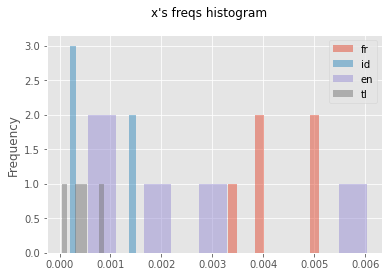

y


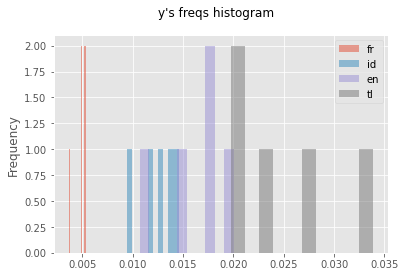

z


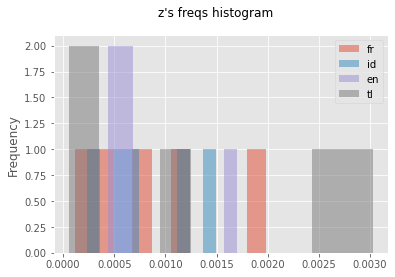

In [ ]:
# 1. 문자 별로 그린다
na_codes = df_tmp.label.unique()
for ch in ascii_lowercase:
  print( ch )
  # 2. 해당 문자의 국가별로 그린다 => 정답 집합이 필요
  #for 국가 in 국가집합(정답집합):
  for 국가 in na_codes:
    # 전체 데이터 df_tmp에서 컬럼이 ch( ex) 'a' )이고, label 컬럼값이 국가( ex) 'en') 인 데이터 추출 
    tmp = df_tmp[ df_tmp.label == 국가 ][ ch ]
    tmp.plot( kind='hist', alpha=0.5, label=국가 )
    pass
  # 범례 표기
  plt.legend()
  # 제목
  plt.suptitle( f'{ch}\'s freqs histogram' )
  # 저장하기
  plt.savefig( f'{ch}.png' )
  # 화면 출력
  plt.show()
  #break


In [ ]:
# 전체 데이터 : df_tmp에서 컬럼이 ch(ex)'a')이고, label 컬럼값이 국가(en)인 데이터 추출3
# 불리언 인덱싱
# df_tmp[조건식]
df_tmp[df_tmp.label == 'en']['a']

2     0.071646
3     0.073806
14    0.072210
16    0.084178
18    0.075952
Name: a, dtype: float64

In [ ]:
df_tmp.label.unique()

array(['fr', 'id', 'en', 'tl'], dtype=object)

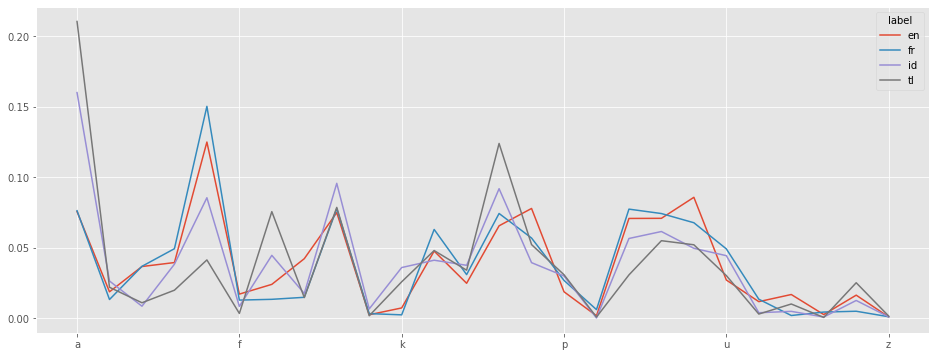

In [ ]:
from IPython.core.pylabtools import figsize
# 선형 그래프
df_tmp_pv.T.plot( kind='line', figsize=(16,6) )

- 시각적 분석을 통해 어느 정도 훈련이 되고, 데이터가 많다면 빈도수를 가지고 구분할 수 있음을 알 수 있었다(실제로는 좀더 수치적인 접근이 필요) 

# 모델 구축

- 머신러닝, 딥러닝등 예측 모델을 구축
- 머신러닝 순서
  - 알고리즘 선정
  - 학습용 데이터, 테스트용 데이터 준비
  - 학습(fit)
  - 예측
  - 성능평가
  - 최적화 -> 기법 -> 학습(반복)
  - 모델 덤프 -> 산출물에서 사용할 수 있는 형태로 제공 -> 사용가이드(usage 제공)

## 머신러닝 사용 버전 확인 및 동기화

- 주피터 환경에서 사용한 모듈 버전과, 산출물 제작에 사용하는 모듈 버전은 일치 해야 한다.
- 최종 파일
  - requirements.txt
- 생성법  
  - $ pip freeze > requirements.txt
- 서비스 환경
  - 1. 가상환경 구축
  - 2. requirements.txt를 이용하여 패키지 설치
- 설치 
  - $ pip install -r requirements.txt  


In [ ]:
# scikit-learn
#!pip list
# 코랩에서 특정 모듈의 버전을 새로 설치하면 그 버전으로 로드된다
# base 환경에서 scikit-learn 버전이 0.24.2 
# 여기서는 버전을 내린다
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 22.3 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
import sklearn 

sklearn.__version__

'0.24.2'

In [ ]:
# 여기서는 플로우가 중심이라서 알고리즘 선정에 특별한 사유는 없다
# 머신러닝 선택시트에 의해서 SVM에 SVC를 사용하겟다
# svm : 서포트 벡터 머신이라는 알고리즘
# 선택사유 생략
from sklearn import svm

# 분류기 classfication
svm.SVC()

clf = svm.SVC()
# 여기서는 알고리즘의 파라미터들은 기본값을 사용하였다
# 차후 이 파라미터들을 가용범위에 여러 후보를 두고 하이퍼파라미터 튜닝을 진행한다
clf

SVC()

## 알고리즘 선정

- 공식 가이드 : 머신러닝 선택시트를 활용
- 유사한 문제를 해결해 보았다면 경험적으로 선택
- 최근 유행하는 주류 알고리즘을 사용
  - 앙상블, XG_BOOST, ...
  - 주류, 주요 알고리즘 위주로 체크
    - 특징, 사용성향, 설계 등등 위주로 체크
- 단기간 대회(해커튼)에서는 기계적으로 교차검증 + 파이프라인 구축해서 상위권 알고리즘으로 최적화 진행
- 연구소별로 제작한 알고리즘, git에 공개된 비주류 알고리즘도 존재
- 알고리즘을 새로 만든다면
  - C/C++ , cython 필수 

## 학습용 데이터, 테스트용 데이터 준비

- 추천 비율
  - 75(훈련용) : 25(테스트용)
  - 50(훈련용) + 25(검증용): 25(테스트용)
- 통상 그렇다!!

In [ ]:
# 독립변수, 특성, feature => 2차원 리스트
X = train_data['freqs']
# 종속변수 정답, 클래스 , label => 1차원 리스트
y = train_data['labels']

## 학습

- **데이터를 알고리즘에 주입**해서, 특정 목적을 잘 달성하도록 **반복적으로 훈련**하는 과정

- 기법
  - 학습된 모델이 서비스에 실시간 반영되는가? 관점
    - 오프라인 학습
      - 시스템 셧다운 후 반영
    - 온라인 학습
      - 실시간 반영
  - 데이터 전체를 학습 시 모두 사용하는가? 관점
    - 한번에 다 밀어넣는다?
      - 배치 학습
    - 전체 데이터를 나눠서 밀어넣는다?
      - 미니 배치 학습
    - 학습시 가용 가능한 메모리(GPU 메모리, 일반 메모리명) 보고 설계 가능      

In [ ]:
clf.fit( X, y )
# 데이터의 양에 따라서, 알고리즘 성능에 따라서 학습 시간은 상이하다

SVC()

## 예측

- **한번도 접하지 않은 데이터**를 학습된 모델(알고리즘, 여기서는 분류기)에 넣어서 정답을 예측한다
- **학습시 만난적이 없는 데이터**

In [ ]:
test_X = test_data['freqs']

pred_y = clf.predict( test_X )

pred_y

array(['tl', 'en', 'fr', 'id', 'tl', 'fr', 'id', 'en'], dtype='<U2')

## 성능평가(생략)

- 분류
  - 혼동행렬 기반
    - 정확도, 정밀도, F1-score, acc, roc 등 기준값
- 회귀
  - 손실함수값, ..    

In [ ]:
# 현재 주제는 분류의 문제이므로, 혼동행령 기반 평가지표로 성능을 평가한다
# 평가도구
from sklearn import metrics

In [ ]:
metrics.accuracy_score(test_data['labels'],pred_y)
# 데이터가 너무 적어서 과적합된거 같다
# 1.0은 좋은 수치가 아니다
# 현재는 100% 정확도를 보인다

1.0

In [ ]:
print(metrics.classification_report(test_data['labels'],pred_y))
# 혼동행렬(오차행렬) 기반 정밀도, 재현율, f1-score, 매크로, 평균 등등 전부 레포트 된다

              precision    recall  f1-score   support

          en       1.00      1.00      1.00         2
          fr       1.00      1.00      1.00         2
          id       1.00      1.00      1.00         2
          tl       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## 최적화(생략)

- 데이터가 부족한가?
- 하이퍼파라미터 튜닝
- 교차검증(알고리즘 조합, 다양성 조함, 시퀀스 조합)
- **파이프라인 구축**
  - 하이퍼파라미터, 알고리즘 조합, 전처리기 등등

## 모델 덤프

- 산출물에서 사용가능하게 형태 조정
- 일반적으로 알고리즘 구조화 학습된 조정값들이 유지되게 저장
- 일반적으로는 파일형태

In [ ]:
# 딥러닝 엔진에는 기능 내장되어 있다
# 별도의 써드 파트 모듈을 사용하기도 한다
import joblib

joblib.__version__

'1.1.0'

In [ ]:
# 확장자는 어떤것을 사용해도 상관없으나
# 특정 모듈을 사용하면 그 네이밍을 따라가거나, 자체 포멧 형태로 정의해도 된다
joblib.dump(clf, 'lang_clf.model')

['lang_clf.model']

In [ ]:
# 분류의 문제이기 때문에 정답 목록도 저장하겠다
label_dict = {
  'en' : '영어',
  'fr' : '프랑스어',
  'id' : '인도네이사어',
  'tl' : '타갈리아어',
}
joblib.dump(label_dict, 'lang_label')

['lang_label']

# 시스템 통합, 산출물, 보고서

- flask 기반으로 1개 페이지 서비스 제작
- UI는 파파고 처럼 유사하게 구성
  - 디자인 미고려, 유사화면 마무리